<a href="https://colab.research.google.com/github/Manash-Christ/AML-Trimester-2/blob/main/Practice2-knn/naive-bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df=pd.read_csv('data - data.csv')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [15]:
# Date time column is not needed in cross-section data. Droping 'date' columns.
df.drop('date',axis=1,inplace=True)

In [5]:
if df.isnull().sum().sum() == 0:
  print("No Nulls found!")

No Nulls found!


#### Separating columns according to data type

In [6]:
ints = [x for x in df.columns if str(df[x].dtype) == 'int64']
flts = [x for x in df.drop('price',axis=1).columns if str(df[x].dtype) == 'float64']
objs = [x for x in df.columns if str(df[x].dtype) == 'object']

#### Plotting bar with other columns

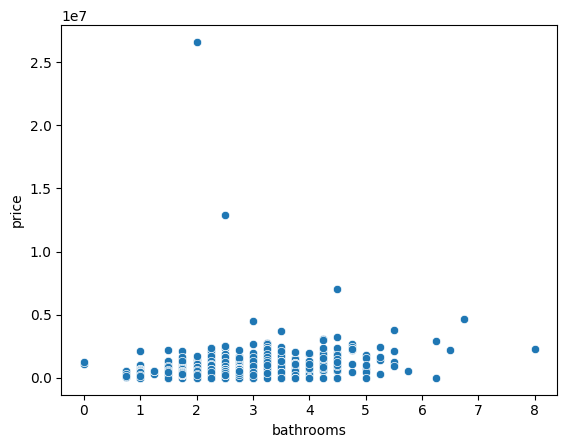

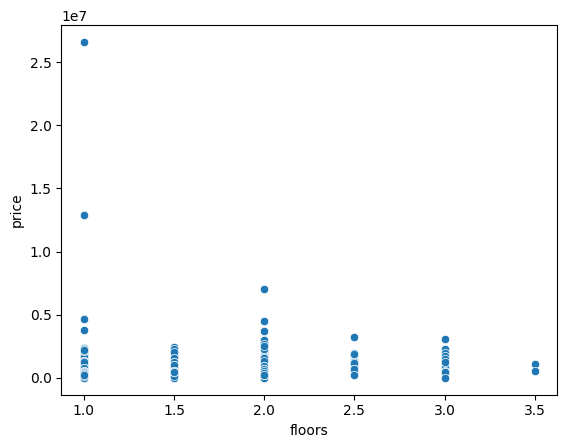

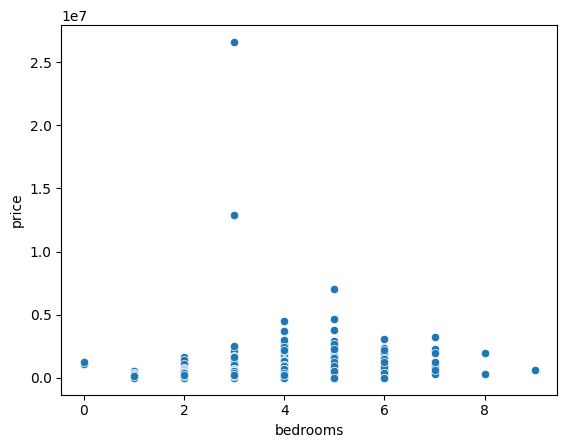

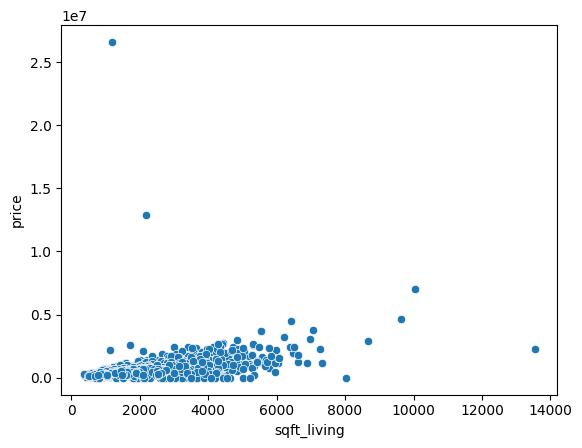

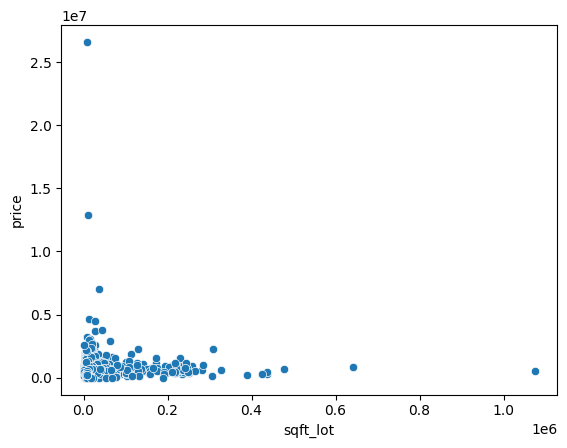

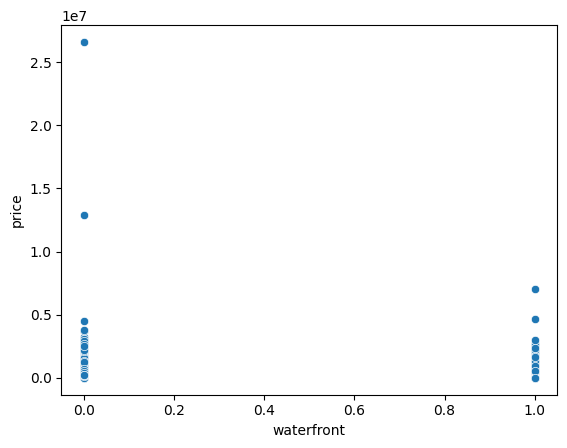

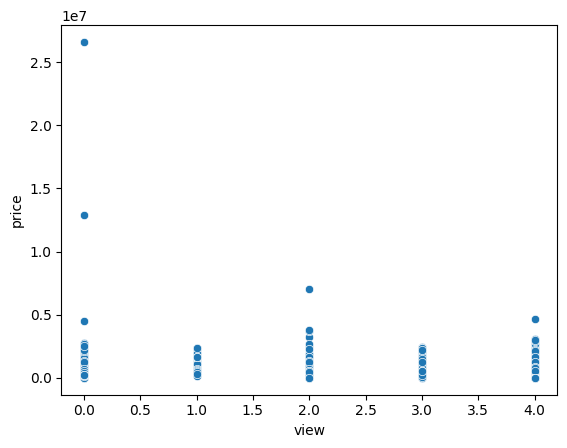

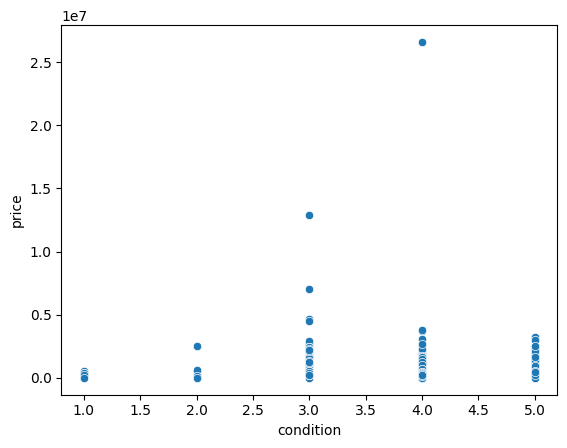

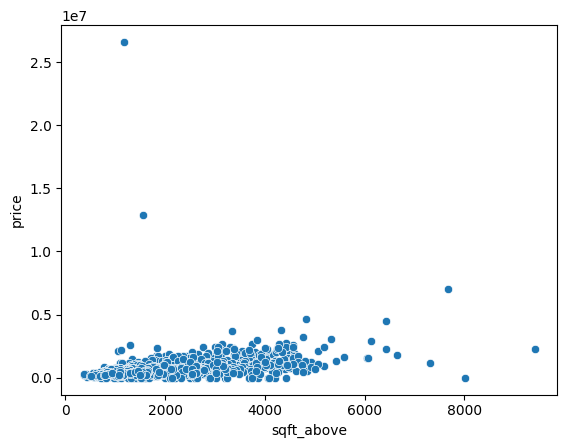

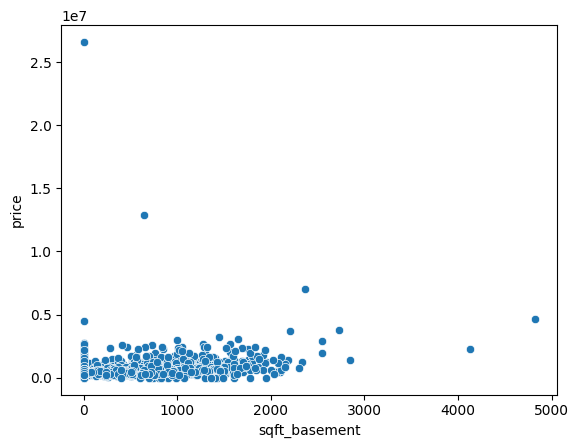

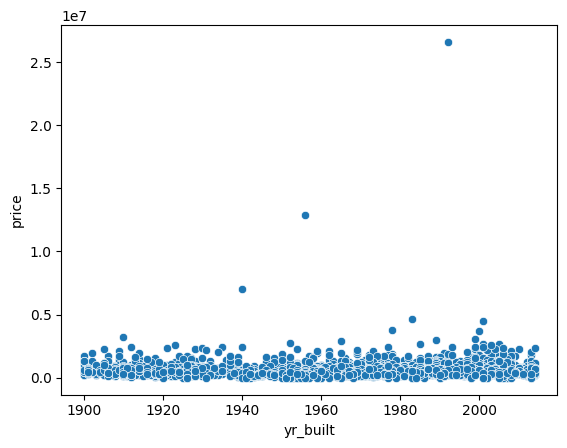

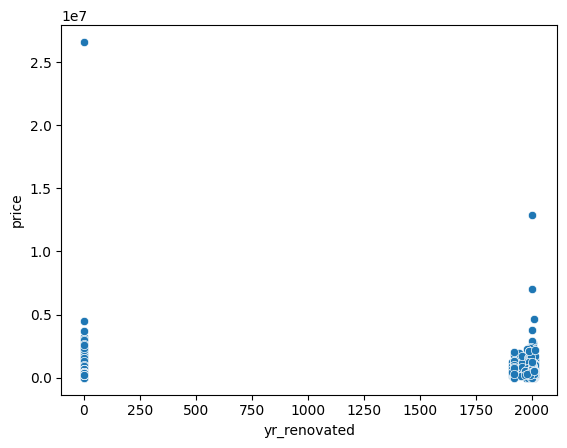

In [7]:
for k in flts+ints:
  sns.scatterplot(x=df[k], y=df['price'])
  plt.show()

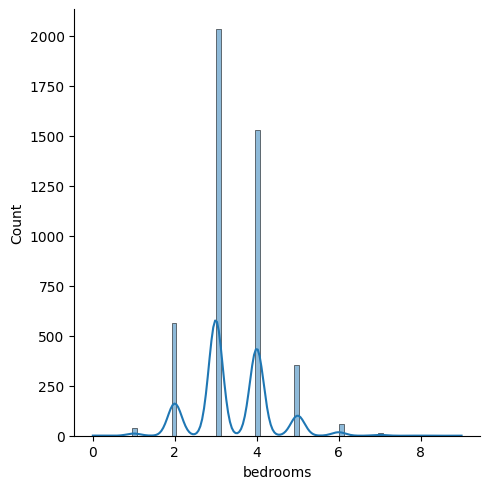

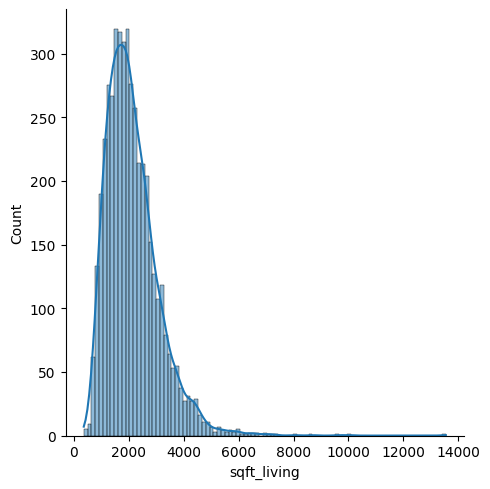

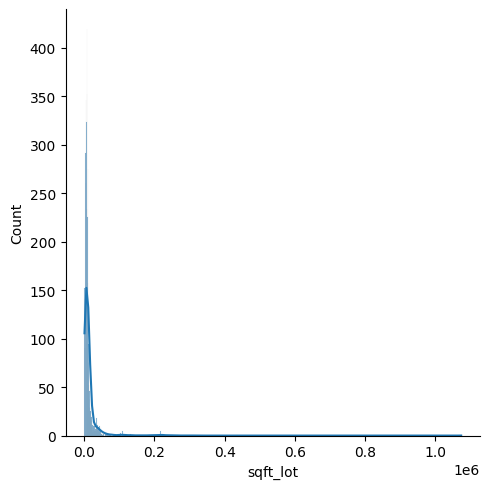

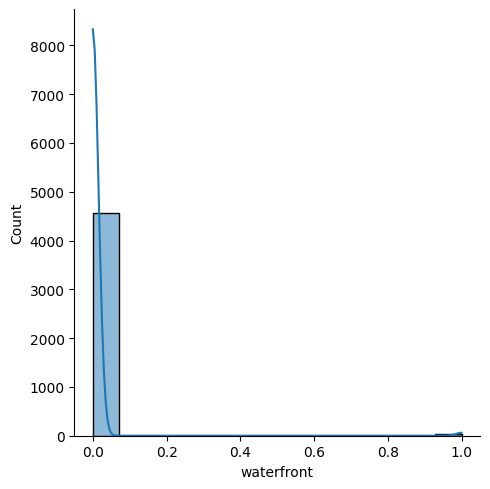

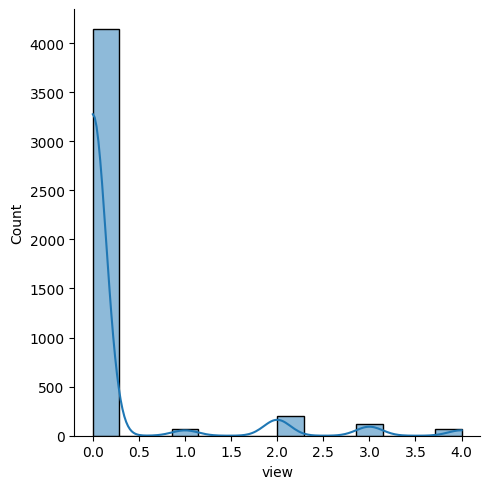

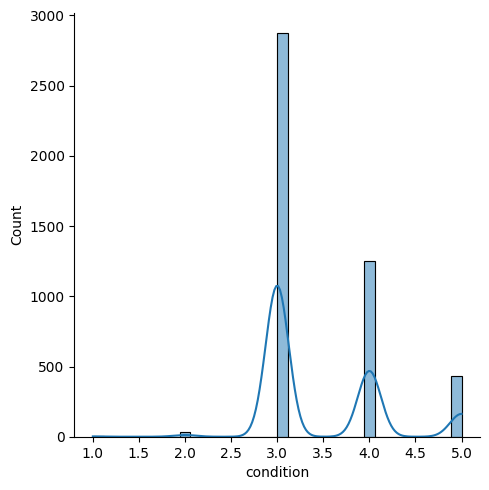

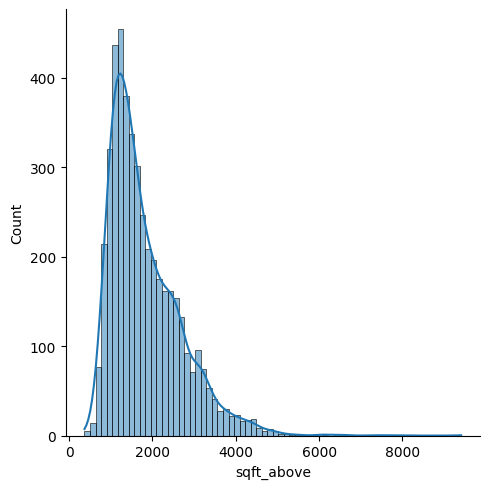

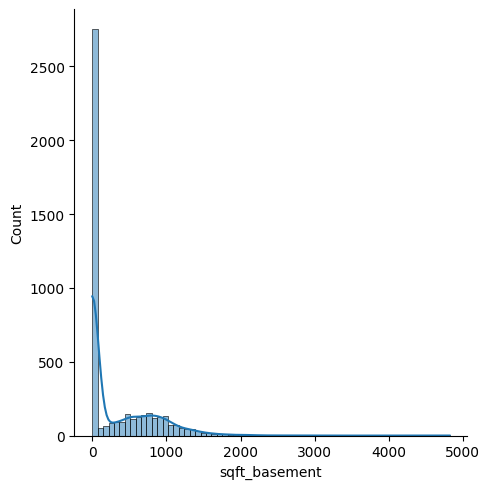

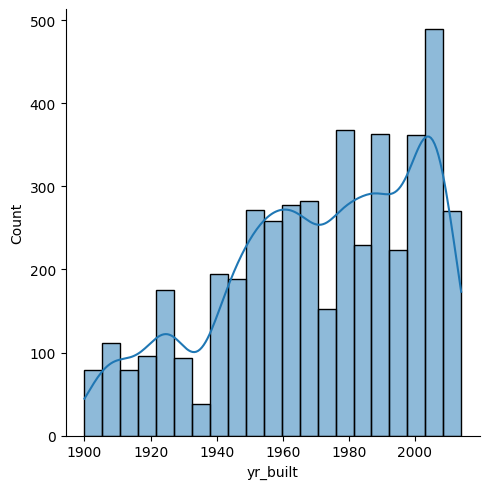

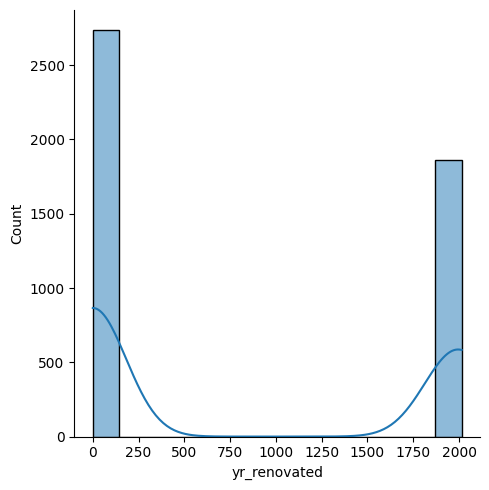

In [8]:
for i in ints:
  sns.displot(data=df,x=df[i],kde=True)
  plt.show()

#### Binning
The columns of year built and square feet above

In [16]:
df.yr_built_binned = pd.cut(df.yr_built, bins=range(1900,2021,20), labels=range(1910, 2011, 20))

<ipython-input-16-59f15cc5cf55>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.yr_built_binned = pd.cut(df.yr_built, bins=range(1900,2021,20), labels=range(1910, 2011, 20))


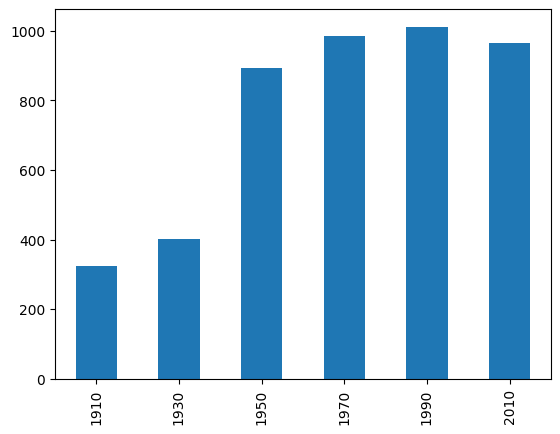

In [18]:
df.yr_built_binned.value_counts().sort_index().plot(kind='bar')

plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min=MinMaxScaler()
stan=StandardScaler()
df_std = df.copy()
df_min = df.copy()
for i in ints+flts:
  df_min[i+'_min'] = min.fit_transform(np.array(df[i]).reshape(-1,1))
  df_min = df_min.drop(i,axis=1)
  df_std[i+'_std'] = stan.fit_transform(np.array(df[i]).reshape(-1,1))
  df_std=df_std.drop(i,axis=1)
df_std.head()

,price,street,city,statezip,country,bedrooms_std,sqft_living_std,sqft_lot_std,waterfront_std,view_std,condition_std,sqft_above_std,sqft_basement_std,yr_built_std,yr_renovated_std,bathrooms_std,floors_std
0,313000.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.441122,-0.829971,-0.193434,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.843204,-0.022416
1,2384000.0,709 W Blaine St,Seattle,WA 98119,USA,1.759705,1.568528,-0.161718,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,0.432802,0.906555
2,342000.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.441122,-0.217367,-0.080978,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.205201,-0.951388
3,420000.0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.441122,-0.144686,-0.190145,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,0.113800,-0.951388
4,550000.0,9105 170th Ave NE,Redmond,WA 98052,USA,0.659291,-0.206984,-0.121306,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,0.432802,-0.951388


#### Plotting scaled data

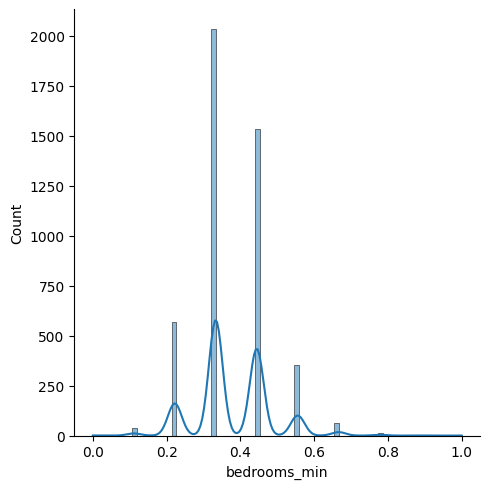

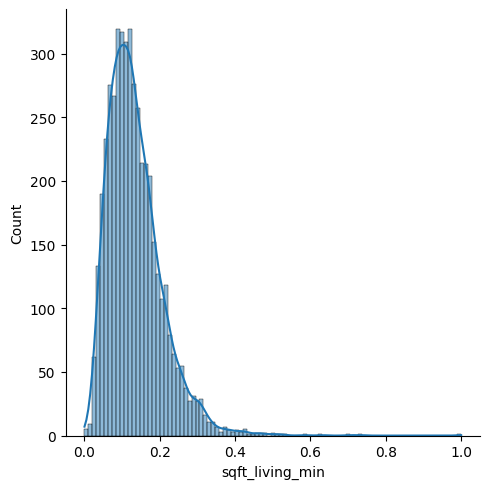

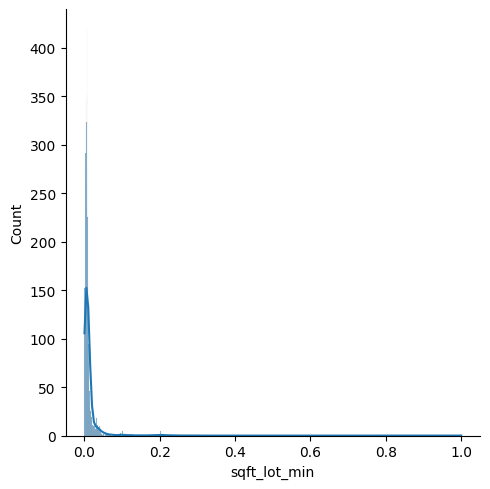

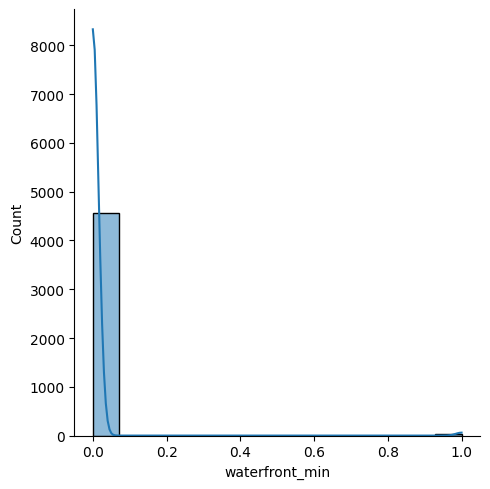

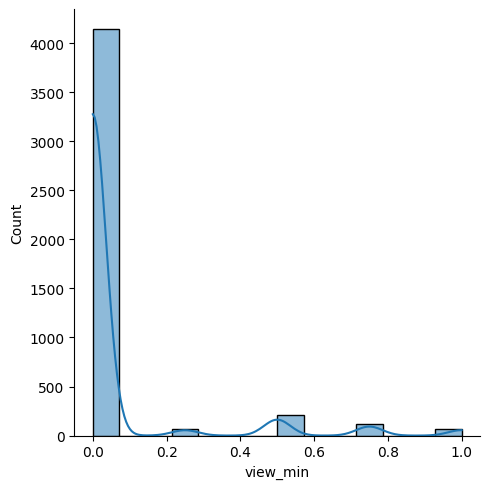

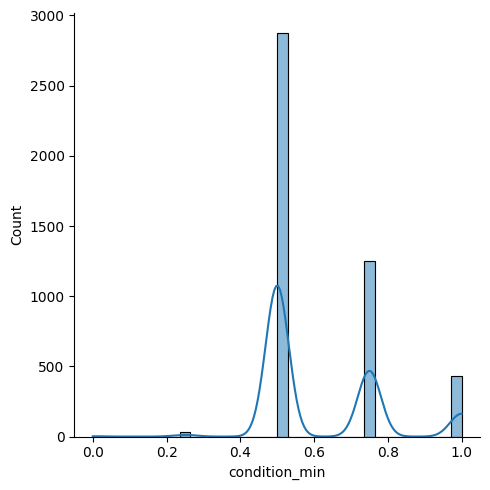

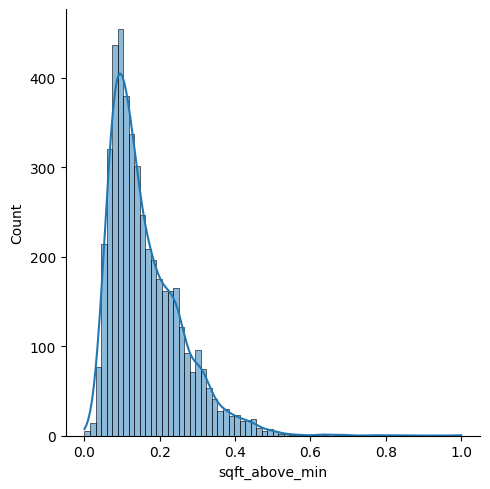

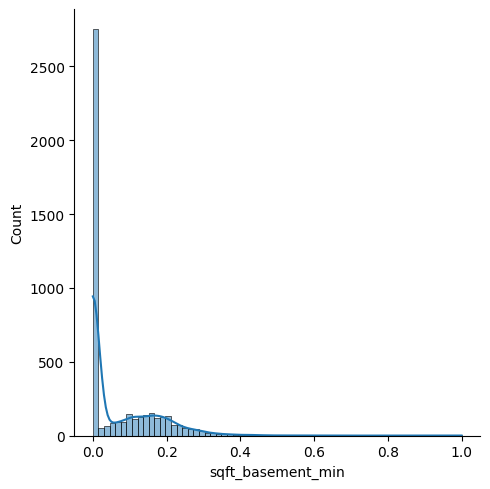

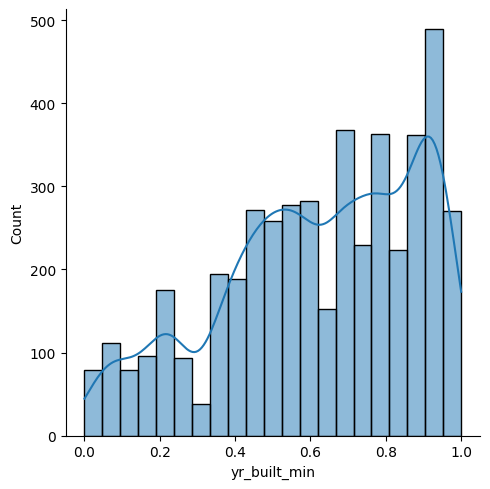

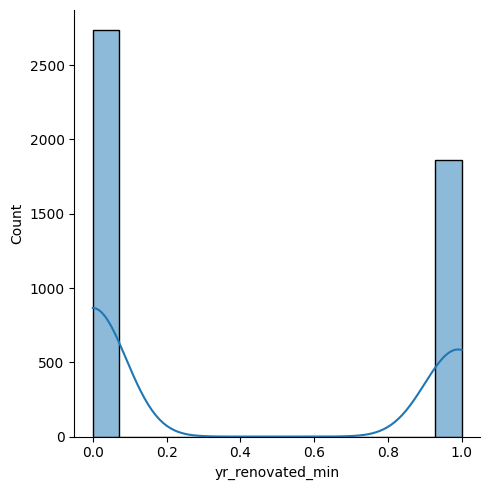

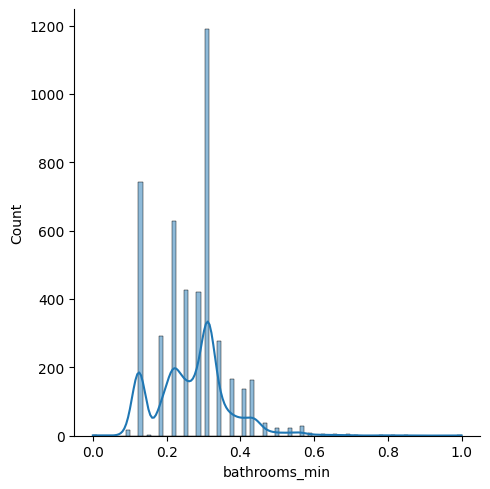

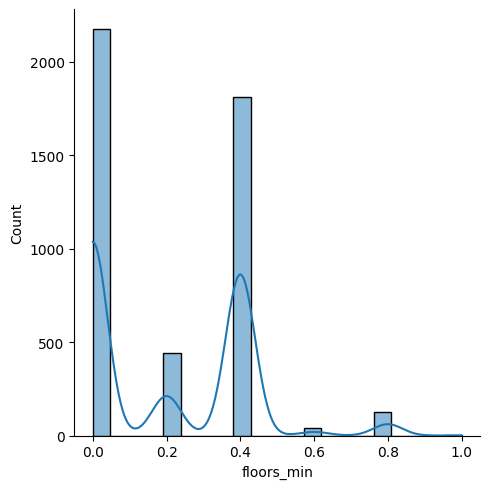

In [20]:
for i in ints+flts:
  sns.displot(df_min[i+'_min'],kde=True)

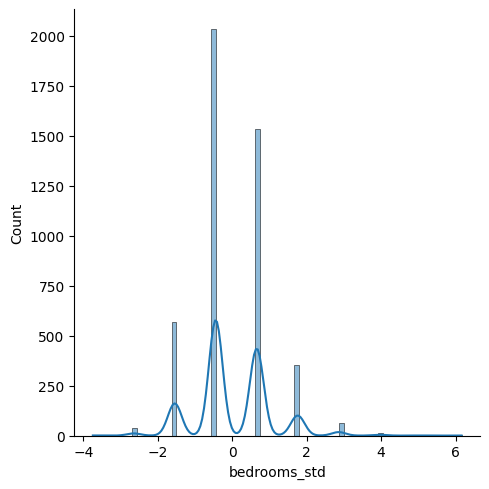

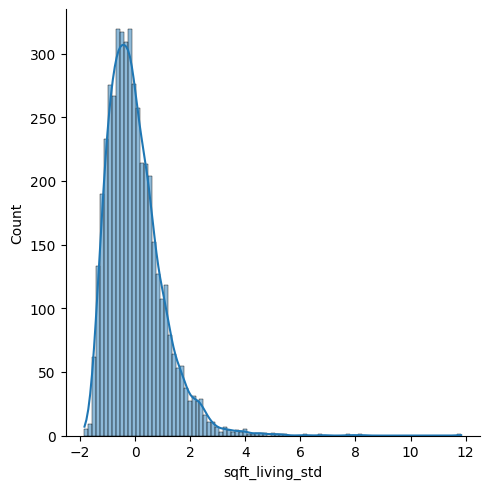

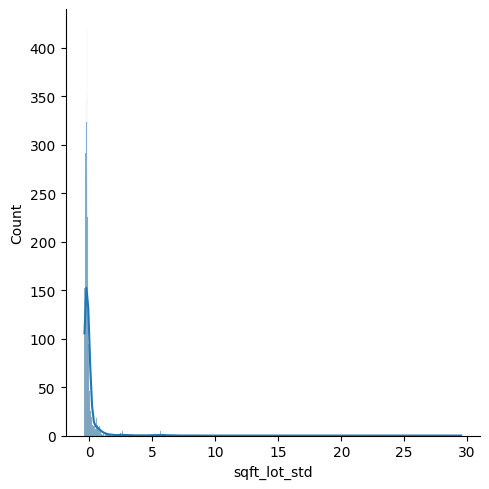

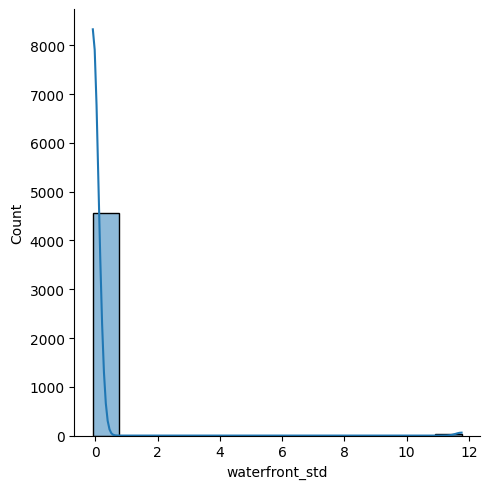

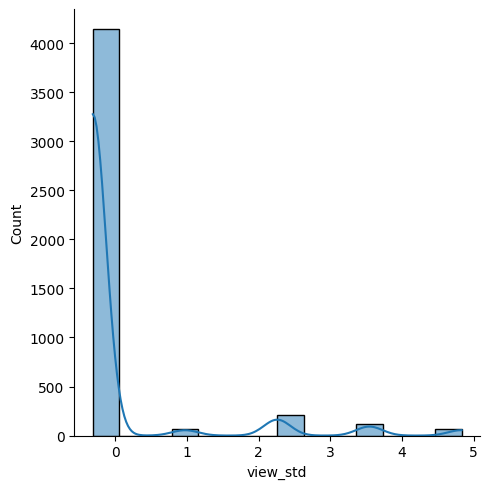

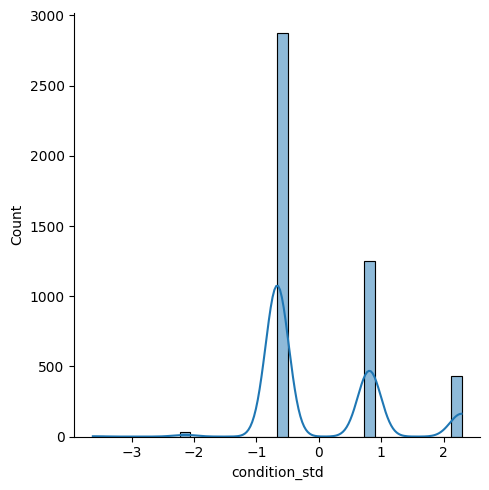

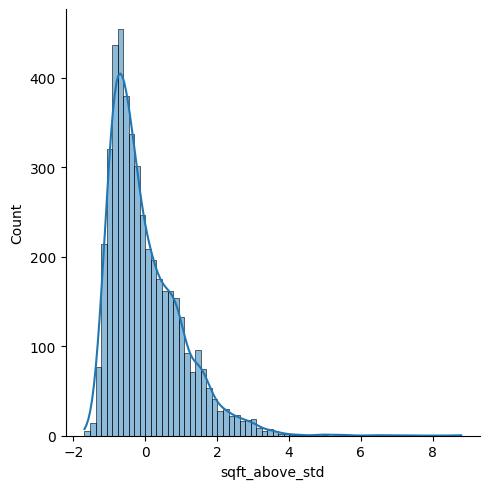

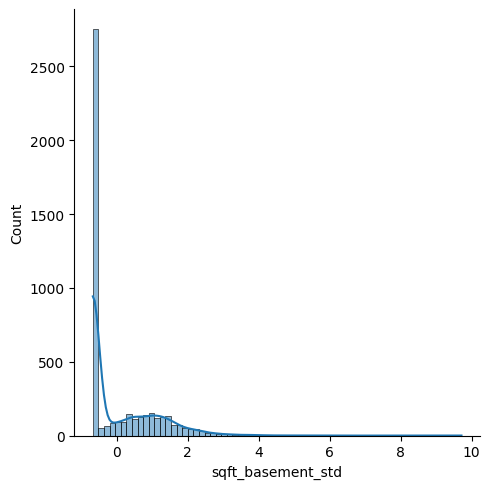

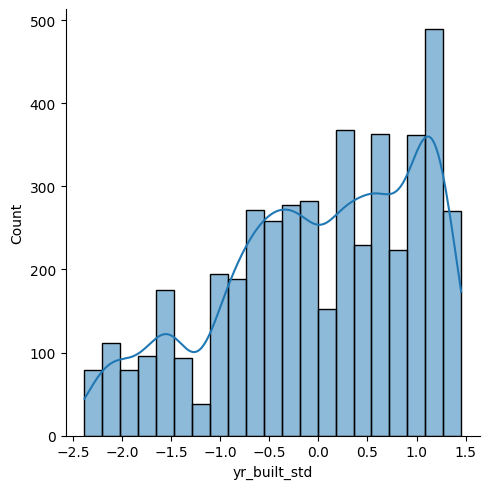

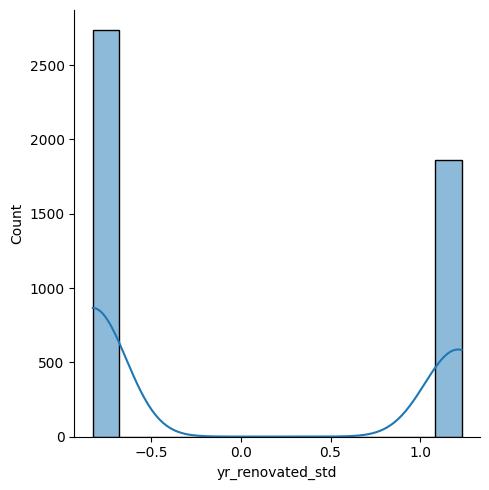

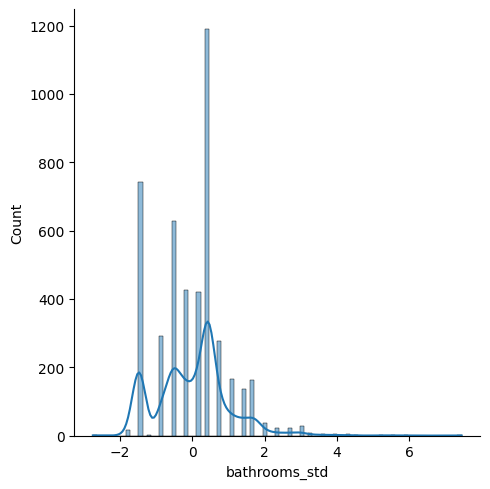

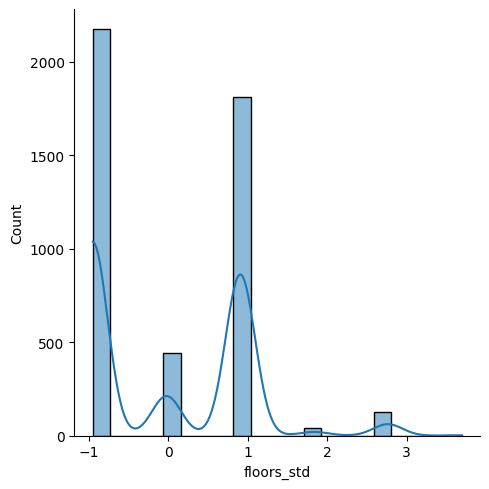

In [21]:
for i in ints+flts:
  sns.displot(df_std[i+'_std'],kde=True)
  plt.show()

#### KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn = knn(n_neighbors: int = 5, *, weights: str = "uniform", algorithm: str = "auto", leaf_size: int = 30, p: int = 2, metric: str = "minkowski")